# Projeto de Recomendação Musical - SoundMatch

## Plano de Execução: Sistema de Recomendação de Músicas

### 1. Definição do Problema e Objetivos
* **Problema:** Usuários de streaming têm dificuldade em encontrar novas músicas que correspondam à "vibe" e intenção emocional do momento, além do gênero.
* **Objetivo:** Desenvolver um sistema híbrido (Aprendizado Supervisionado + Similaridade de Cosseno) que sugira 5 faixas semanticamente alinhadas à entrada.

### 2. Escopo e Requisitos
* **Dados:** Dataset do Spotify (~30k músicas) com 12 atributos de áudio.
* **Limitações:** Hardware (RAM limitada no Colab), Subjetividade musical e dependência de rotulagem manual.
* **Entregáveis:** Notebook documentado e Protótipo Web Funcional.




#Analise Exploratorio de Dados

##Librarias a usar


  - **Numpy** - **computação numérica** em Python
 - **Pandas** - Manipulação e **análise de dados**
 - **SciPy**- Escossistema para matemática, ciência e engenharia
 - **Matplotlib** - **Visualizações** em Python
 - **Seaborn** - Visualização estatística

In [ ]:
import numpy as np
import pandas as pd
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns

##Carregamento do Dataset

In [ ]:
#Carregar o dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'
df = pd.read_csv(url)
#Imprimir primeiras linhas do dataset
print(df.head())
#Informações geral do dataset
print(df.info())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

##Compreensão dos dados


In [ ]:
# @title
print("🏗️ ESTRUTURA DOS DADOS")
print("=" * 50)

# Informações básicas
print(f"\n📊 Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
print(f"\n📝 Tipos de dados:")
print(df.dtypes)

# Memória utilizada
memoria = df.memory_usage(deep=True).sum() / 1024
print(f"\n💾 Memória utilizada: {memoria:.2f} KB")

# Valores únicos
print(f"\n🔢 Valores únicos por coluna:")
for col in df.columns:
    n_unique = df[col].nunique()
    print(f"  {col}: {n_unique} valores únicos")

🏗️ ESTRUTURA DOS DADOS

📊 Dimensões: 32833 linhas × 23 colunas

📝 Tipos de dados:
track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

💾 Memória utilizada: 24697.31 KB

🔢 Valores únicos por coluna:
  track_id: 

##Qualidade dos dados

In [ ]:
# @title
print("🔍 QUALIDADE DOS DADOS")
print("=" * 50)

features= ['track_name','track_artist','track_album_name']

for feature in features:
  df[feature] = df[feature].astype(str)
  #print(df[feature].sum())  # agora concatena tudo


# Valores ausentes
missing = df.isnull().sum()
print(f"\n❌ Valores ausentes:")
missing= df.isnull().sum()
print(missing)

# Duplicatas
duplicatas = df.duplicated().sum()
print(f"\n🔄 Linhas duplicadas: {duplicatas}")
if duplicatas > 0:
    print(f"  ⚠️ {duplicatas} linhas duplicadas encontradas")

# Balanceamento das classes
print(f"\n⚖️ Distribuição do genero musical:")
genre_counts = df['playlist_genre'].value_counts()
for species, count in genre_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {species}: {count} ({pct:.1f}%)")

if genre_counts.std() < 1:

    print("  ✅ Dataset perfeitamente balanceado!")
else:
    print("  ⚠️ Dataset desbalanceado!")

print(genre_counts.std())
print(genre_counts)


🔍 QUALIDADE DOS DADOS

❌ Valores ausentes:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

🔄 Linhas duplicadas: 0

⚖️ Distribuição do genero musical:
  edm: 6043 (18.4%)
  rap: 5746 (17.5%)
  pop: 5507 (16.8%)
  r&b: 5431 (16.5%)
  latin: 5155 (15.7%)
  rock: 4951 (15.1%)
  ⚠️ Dataset desbalanceado!
393.9423392663787
playlist_genre
edm      6

##Medidas de tendencia central

###Moda para variavéis categóricas

In [ ]:
#Criação de uma lista com as columnas que quermos saber as medidas de tendencia central
#Se seleccionaron las variables que hacian mas sentido conocer la T.C
features = ['track_name', 'track_artist', 'playlist_genre', 'track_album_name']
for feature in features:
  moda_val = df[feature].mode()[0]
  print()
  print(f"A moda do atributo {feature} é {moda_val}")


A moda do atributo track_name é Poison

A moda do atributo track_artist é Martin Garrix

A moda do atributo playlist_genre é edm

A moda do atributo track_album_name é Greatest Hits


###Mediana e media para variavéis numéricas

In [ ]:
featuresNumericas = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

for featureNumerica in featuresNumericas:
  media_val= df[featureNumerica].median()
  print()
  print(f"A media de {featureNumerica} é {media_val}")
  mediana_val = df[featureNumerica].mean()
  print(f"A mediana de {featureNumerica} é {mediana_val}")


A media de danceability é 0.672
A mediana de danceability é 0.6548495202996985

A media de energy é 0.721
A mediana de energy é 0.6986192707032558

A media de key é 6.0
A mediana de key é 5.374470806810222

A media de loudness é -6.166
A mediana de loudness é -6.719499131970883

A media de mode é 1.0
A mediana de mode é 0.5657113270185484

A media de speechiness é 0.0625
A mediana de speechiness é 0.10706806871135749

A media de acousticness é 0.0804
A mediana de acousticness é 0.1753337150793409

A media de instrumentalness é 1.61e-05
A mediana de instrumentalness é 0.08474716133310999

A media de liveness é 0.127
A mediana de liveness é 0.19017619529132274

A media de valence é 0.512
A mediana de valence é 0.5105609737154692

A media de tempo é 121.984
A mediana de tempo é 120.88113154448268

A media de duration_ms é 216000.0
A mediana de duration_ms é 225799.811622453


###Graficos de tendencia central

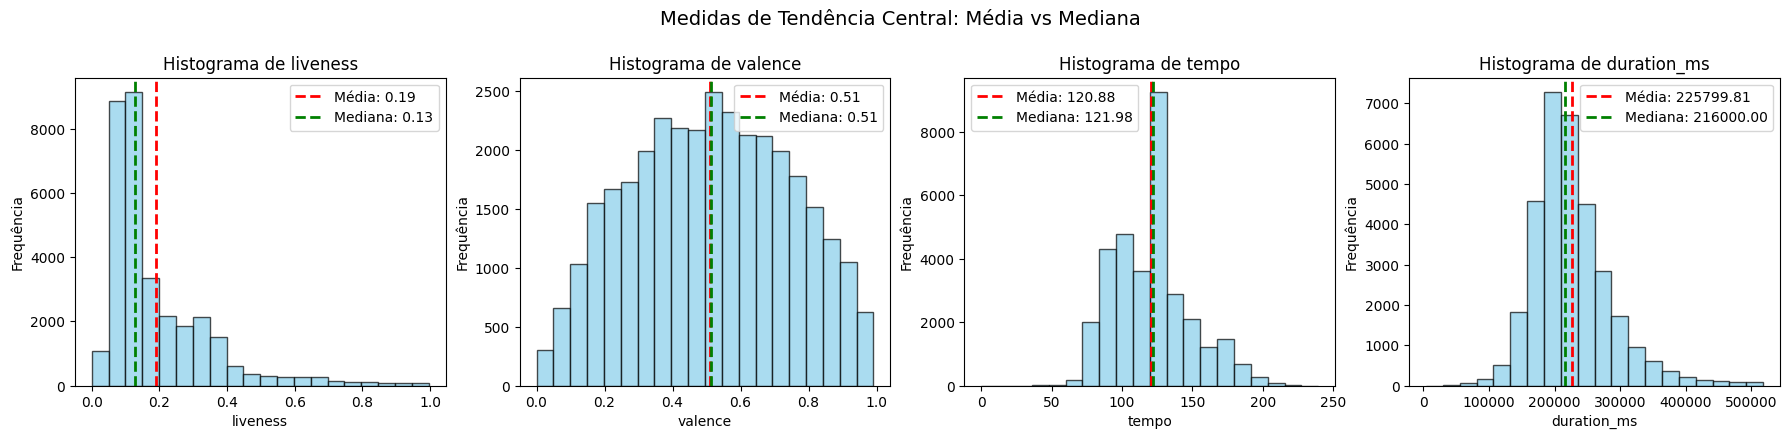

In [ ]:
featuresNumericas1 = ['liveness', 'valence', 'tempo', 'duration_ms']
fig, axes = plt.subplots(1, 4, figsize=(22, 4))
fig.suptitle('Medidas de Tendência Central: Média vs Mediana', fontsize=14, y=1.05)

for idx, feature in enumerate(featuresNumericas1):
    ax = axes[idx]
    # Histograma
    ax.hist(df[feature], bins=20, alpha=0.7, color='skyblue', edgecolor='black')

    #Definir valores de media y mediana para no caer en el error de tener el mismo
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    #Definir lineas que pasen por los histogramas
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    ax.legend() #colocar cuadrito indicando los valores

    #colocar titulo, nombre en x, nombre en y
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequência')
    ax.set_title(f'Histograma de {feature}')

###Desviação estandar

### Problema: Diferenças nas caraterizações pra as mesmas músicas


Para entender o que as medidas de dispersão nos dizem, foi feita uma comparação da variável **Intensidade da Fala** na música mais ouvida para determinar o valor de Intensidade da Fala mais frequente.

No entanto, surgiu uma contradição, pois o valor de **Intensidade da Fala** é diferente para a mesma música, levantando dúvidas sobre a consistência dos dados no contexto musical.

Función para calcular dispersión en cada variable

In [ ]:
def desvio(feature1):
        df.loc[df['track_name']=='Poison', feature1]
        feature_dataFrame = df[df["track_name"] == "Poison"][["track_name","track_artist",feature1]]
        print(feature_dataFrame)

        fig, ax= plt.subplots(1,1,figsize=(10,5))
        fig.suptitle(f"Desviación padrao do {feature1}", fontsize=14, y=1.02)

        mean = feature_dataFrame[feature1].mean()
        std = feature_dataFrame[feature1].std()
        cv = (std/mean) * 100

        print(f"media : {mean}")
        print(f"Desviación estandar : {std}")
        print(f"Coeficiente de variación : {cv}")
        count, bins, patches = ax.hist(feature_dataFrame[feature1], bins=20, alpha=0.5, color='skyblue', edgecolor='black')
        # Linha da média
        ax.axvline(mean, color='red', linewidth=2, label='Média', zorder=5)
        # Faixas de desvio padrão
        ax.axvspan(mean-std, mean+std, alpha=0.3, color='yellow', label='±1σ (68%)', zorder=3)
        ax.axvspan(mean-2*std, mean+2*std, alpha=0.2, color='orange', label='±2σ (95%)', zorder=2)
        ax.axvspan(mean-3*std, mean+3*std, alpha=0.1, color='red', label='±3σ (99.7%)', zorder=1)

        ax.set_title(f'{feature1.replace("_", " ").title()}\nCV: {cv:.1f}%')
        ax.set_xlabel('Valor (cm)')
        ax.set_ylabel('Frequência')
        ax.legend(fontsize=10, loc='upper right')
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

###Solução do problema

🎵 A Intensidade fala mede o quanto uma música se assemelha à linguagem falada.

🔹 Próximo de 1,0 → quase inteiramente falada (ex.: audiolivro, podcast, palestra, poesia).

🔹 Entre 0,33 e 0,66 → uma mistura de música e partes faladas (ex.: rap, músicas com trechos falados).

🔹 Menos de 0,33 → principalmente música, com pouca ou nenhuma linguagem falada.

👉 Em outras palavras: quanto maior o valor de fala, mais "falada" é a faixa; quanto menor o valor, mais "tradicional" é a música.

In [ ]:
df.loc[df['track_name']=='Poison', 'speechiness']

,speechiness
2242,0.0542
6751,0.2660
10304,0.0455
12250,0.1090
12863,0.1090
13078,0.1090
13304,0.1170
14955,0.1090
15280,0.1170
15396,0.1090


A possível razão pela qual **Speechiness** soa diferente, mesmo sendo a mesma música, é porque ela é **interpretada por artistas diferentes, o que causa uma mudança nessa variável**.

In [ ]:
Posion_dataFrame = df[df["track_name"] == "Poison"][["track_name","track_artist","speechiness"]]
print(Posion_dataFrame)
print(Posion_dataFrame.info())

      track_name      track_artist  speechiness
2242      Poison          Rita Ora       0.0542
6751      Poison  Sidhu Moose Wala       0.2660
10304     Poison            Coopex       0.0455
12250     Poison      Alice Cooper       0.1090
12863     Poison      Alice Cooper       0.1090
13078     Poison      Alice Cooper       0.1090
13304     Poison      Alice Cooper       0.1170
14955     Poison      Alice Cooper       0.1090
15280     Poison      Alice Cooper       0.1170
15396     Poison      Alice Cooper       0.1090
21765     Poison      Brent Faiyaz       0.0650
23176     Poison            Coopex       0.0455
23192     Poison             Awich       0.1350
24061     Poison    Bell Biv DeVoe       0.2100
24126     Poison    Bell Biv DeVoe       0.1920
24268     Poison    Bell Biv DeVoe       0.2030
24420     Poison    Bell Biv DeVoe       0.2100
24482     Poison    Bell Biv DeVoe       0.2280
24683     Poison    Bell Biv DeVoe       0.2160
24787     Poison    Bell Biv DeVoe      

Conclusão

A variável Speechiness pode depender do artista, não apenas da música.

A mesma música pode ter valores de Speechiness diferentes.

Considerações Futuras 1. Se a variável depende do artista, isso significa que, ao criar uma solicitação de recomendação baseada em música, deve-se considerar que ela também dependerá do intérprete.

Exemplo

O fato de eu gostar da música "Corazón Partido" do grupo Menos é Mais não significa que eu gostarei da mesma música "Corazón Partido" interpretada por Alejandro Sanz.

**Visualização do conceito do desvío padrão**

Speechiness mede a proporção da voz falada na música, numa escala de 0 a 1.

media 0.1336818181818182
Desviación estandar 0.07115036148463295
Coeficiente de variación 53.22366381033405


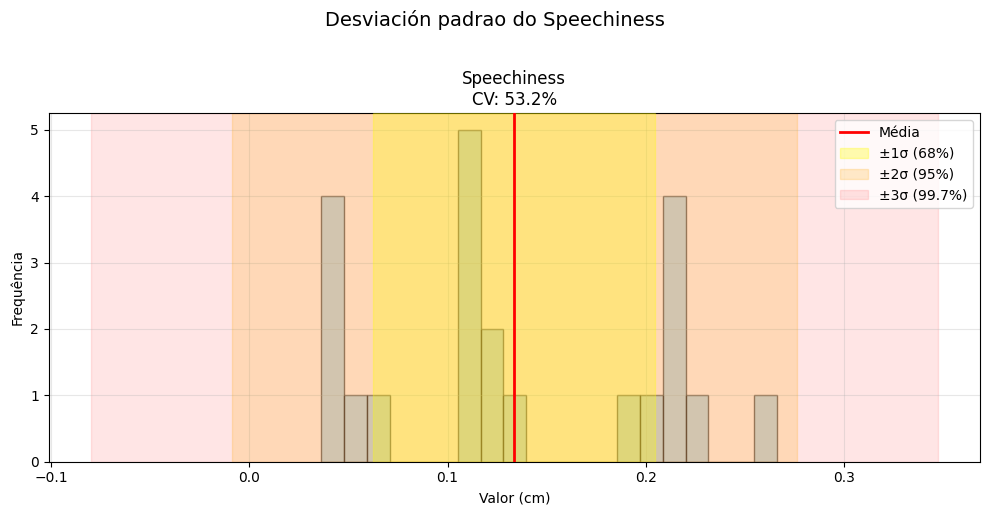

In [ ]:
fig, ax= plt.subplots(1,1,figsize=(10,5))
fig.suptitle("Desviación padrao do Speechiness", fontsize=14, y=1.02)
feature= 'speechiness'
mean = Posion_dataFrame[feature].mean()
std = Posion_dataFrame[feature].std()
cv = (std/mean) * 100

print(f"media {mean}")
print(f"Desviación estandar {std}")
print(f"Coeficiente de variación {cv}")
count, bins, patches = ax.hist(Posion_dataFrame[feature], bins=20, alpha=0.5, color='skyblue', edgecolor='black')
# Linha da média
ax.axvline(mean, color='red', linewidth=2, label='Média', zorder=5)
# Faixas de desvio padrão
ax.axvspan(mean-std, mean+std, alpha=0.3, color='yellow', label='±1σ (68%)', zorder=3)
ax.axvspan(mean-2*std, mean+2*std, alpha=0.2, color='orange', label='±2σ (95%)', zorder=2)
ax.axvspan(mean-3*std, mean+3*std, alpha=0.1, color='red', label='±3σ (99.7%)', zorder=1)

ax.set_title(f'{feature.replace("_", " ").title()}\nCV: {cv:.1f}%')
ax.set_xlabel('Valor (cm)')
ax.set_ylabel('Frequência')
ax.legend(fontsize=10, loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Conclusão do problema

A importança de reconhecer esse problemas nas músicas ajudou a gente reconhecer que as música não vão depender do nome da música ou do artista, sempre vai depender de como as diferentes características estão determinadas na música e isso vai determinar um futuro agrupamento das músicas.

##Implementação modelo

In [ ]:
# SETUP INICIAL
import pandas as pd
import numpy as np
import warnings
import gc
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display

# Configurações
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

print("Carregando dataset original")
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'
df_raw = pd.read_csv(url)

# Features numéricas de áudio
audio_features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms'
]

# LIMPEZA E OTIMIZAÇÃO DE MEMÓRIA
df_clean = df_raw.drop_duplicates(subset=['track_id']).dropna(subset=audio_features).reset_index(drop=True)
df_clean[audio_features] = df_clean[audio_features].astype('float32')

# Índice para busca rápida
indices = pd.Series(df_clean.index, index=df_clean['track_name'])

print(f"Total de músicas: {df_clean.shape[0]}")

Carregando dataset original
Total de músicas: 28356


## Análise de Complexidade e Decisão Técnica

O dataset possui aproximadamente 30.000 faixas. Uma abordagem tradicional de recomendação calcularia uma matriz de similaridade $N \times N$.
* **Custo de Memória:** $30.000^2 \approx 900$ milhões de células, inviabilizando a execução no Colab.

**Nossa Solução:**
Calculamos a similaridade apenas entre a música de entrada e o dataset no momento da consulta.

In [ ]:
# TENTATIVA 1: BASELINE
print("Tentativa 1: Similaridade de Cosseno")

# Escalonamento
scaler = MinMaxScaler()
df_baseline = df_clean.copy()
df_baseline[audio_features] = scaler.fit_transform(df_baseline[audio_features])

def recomendar_v1(track_name):
    try:
        if track_name not in indices: return "Música não encontrada."
        idx = indices[track_name]
        if isinstance(idx, pd.Series): idx = idx.iloc[0]

        # Pega o vetor da música escolhida
        target = df_baseline.iloc[[idx]][audio_features]

        # Calcula similaridade contra o dataset
        sim_scores = cosine_similarity(target, df_baseline[audio_features])[0]

        # Ordena e pega Top 5
        top_indices = pd.Series(sim_scores).sort_values(ascending=False).iloc[1:6].index

        return df_clean.iloc[top_indices][['track_name', 'track_artist', 'playlist_subgenre']]
    except Exception as e:
        return f"Erro: {e}"

# Teste e Validação
# Falha observada: Mistura gêneros opostos (ex: Rock com Pop) só porque têm a mesma "energia".
musica_teste = "Let It Be - Remastered 2009"
print(f"\nResultados (Baseline) para: {musica_teste}")
display(recomendar_v1(musica_teste))

# Limpa memória
del df_baseline
gc.collect()

Tentativa 1: Similaridade de Cosseno

Resultados (Baseline) para: Let It Be - Remastered 2009


,track_name,track_artist,playlist_subgenre
20730,Per due che come noi,Brunori Sas,hip pop
1420,What A Time (feat. Niall Horan),Julia Michaels,post-teen pop
23322,Better Off,Quadron,neo soul
19856,Woman,HONNE,urban contemporary
25686,Find You,Landon Forbes,big room


21510

## Tentativa 2: Clustering Não-Supervisionado (K-Means)

**Hipótese:** Tentar agrupar as músicas automaticamente para encontrar padrões ocultos.
**Resultado:** O K-Means gerou clusters muito heterogêneos. Por exemplo, músicas clássicas e ruídos de chuva ficaram no mesmo grupo apenas por terem "baixa energia", o que não faz sentido musicalmente.

In [ ]:
# TENTATIVA 2: K-MEANS
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import gc

print("Tentativa 2")

# Preparação e Escalonamento
df_kmeans = df_clean.copy()
scaler_km = MinMaxScaler()
df_kmeans[audio_features] = scaler_km.fit_transform(df_kmeans[audio_features])

# Feature Engineering
df_kmeans['vibe_score'] = df_kmeans[['danceability','energy','valence']].mean(axis=1)
df_kmeans['emotional_feel'] = (df_kmeans['valence'] + df_kmeans['danceability'])/2
df_kmeans['introspective_score'] = df_kmeans['acousticness'] * (1 - df_kmeans['valence'])

# Seleção de features para o cluster
cluster_features = ['vibe_score', 'emotional_feel', 'danceability', 'introspective_score']
X_cluster = df_kmeans[cluster_features]

# Loop para encontrar o K ótimo
print(f"Calculando o melhor K (4 a 19)")
scores = []
K_range = range(4, 20)

# amostra de 10.000 músicas para não travar a memória
X_sample = X_cluster.sample(n=min(10000, len(X_cluster)), random_state=42)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels_temp)
    scores.append(score)
    print(f"K={k}: Silhouette={score:.4f}")

best_k = K_range[np.argmax(scores)]
print(f"\nMelhor número de clusters encontrado: {best_k}")

# Treinar KMeans Final com o Melhor K
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_kmeans['cluster'] = kmeans_final.fit_predict(X_cluster)

print("Distribuição Final dos Clusters:")
print(df_kmeans['cluster'].value_counts().sort_index())

# Função de Recomendação para Validação
def recomendar_kmeans(track_name):
    try:
        if track_name not in indices: return "Erro: Música não encontrada."
        idx = indices[track_name]
        if isinstance(idx, pd.Series): idx = idx.iloc[0]

        target_cluster = df_kmeans.loc[idx, 'cluster']
        candidatos = df_kmeans[df_kmeans['cluster'] == target_cluster]

        # Retorna 5 do mesmo cluster
        return df_clean.loc[candidatos.sample(5).index][['track_name', 'track_artist', 'playlist_subgenre']]
    except Exception as e: return str(e)

print(f"\nExemplo de clusterização para 'Let It Be - Remastered 2009':")
display(recomendar_kmeans('Let It Be - Remastered 2009'))

# Limpeza
del df_kmeans, X_cluster, X_sample
gc.collect()

Tentativa 2
Calculando o melhor K (4 a 19)
K=4: Silhouette=0.3179
K=5: Silhouette=0.3224
K=6: Silhouette=0.2706
K=7: Silhouette=0.2781
K=8: Silhouette=0.2628
K=9: Silhouette=0.2547
K=10: Silhouette=0.2619
K=11: Silhouette=0.2644
K=12: Silhouette=0.2496
K=13: Silhouette=0.2506
K=14: Silhouette=0.2470
K=15: Silhouette=0.2462
K=16: Silhouette=0.2458
K=17: Silhouette=0.2368
K=18: Silhouette=0.2336
K=19: Silhouette=0.2315

Melhor número de clusters encontrado: 5
Distribuição Final dos Clusters:
cluster
0    9031
1    5644
2    9393
3    1362
4    2926
Name: count, dtype: int64

Exemplo de clusterização para 'Let It Be - Remastered 2009':


,track_name,track_artist,playlist_subgenre
19867,Pray You Catch Me,Beyoncé,urban contemporary
5032,Verdammte Schei*e,Giulia Becker,indie poptimism
19557,goodbye,Billie Eilish,urban contemporary
8566,Sober,2Scratch,gangster rap
16016,Vuelve,Ricky Martin,latin pop


31

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Tentativa 3: Regras Manuais

Para superar a subjetividade da "vibe", utilizamos regras de negócio baseadas em conhecimento musical para pré-classificar o dataset.
Esta etapa foi crucial para gerar o uma amostra de 300 músicas que foram validadas e rotuladas manualmente pela equipe para treinar o modelo na etapa seguinte.

In [ ]:
# TENTATIVA 3
print(" Tentativa 3: Criando Regras Manuais...")

df_rules = df_clean.copy()
scaler_rules = MinMaxScaler()
df_rules[audio_features] = scaler_rules.fit_transform(df_rules[audio_features])

# 1. Engenharia de Features Completa
df_rules['emotional_feel'] = (df_rules['valence'] + df_rules['danceability']) / 2
df_rules['instrumental_complexity'] = df_rules['instrumentalness'] * (1 - df_rules['speechiness'])
df_rules['acoustic_vs_electronic'] = df_rules['acousticness'] - df_rules['energy']
df_rules['musical_energy'] = (df_rules['energy'] + df_rules['loudness']) / 2
df_rules['performance_intensity'] = (df_rules['energy'] + df_rules['liveness'] + df_rules['valence']) / 3
df_rules['rhythmic_emotion'] = df_rules['danceability'] * df_rules['valence']
df_rules['sound_strength'] = df_rules['energy'] * (1 + df_rules['loudness'])
df_rules['introspective_score'] = df_rules['acousticness'] * (1 - df_rules['valence'])
df_rules['vibe_score'] = df_rules[['danceability', 'energy', 'valence']].mean(axis=1)

# 2. Definição dos Clusters Manuais
conditions = [
    # 1. Instrumental (Mais importante, vem primeiro)
    (df_rules['instrumentalness'] > 0.7) | (df_rules['instrumental_complexity'] > 0.8),

    # 2. Rap/Spoken Word
    (df_rules['speechiness'] > 0.45) & (df_rules['energy'] > 0.4),

    # 3. Gravação ao Vivo
    (df_rules['liveness'] > 0.75),

    # 4. Acústico Introspectivo (Foco em tristeza/calma)
    (df_rules['acousticness'] > 0.5) & (df_rules['introspective_score'] > 0.3) & (df_rules['valence'] < 0.5),

    # 5. Pop de Academia/EDM (Alta energia, muito dançante)
    (df_rules['energy'] > 0.75) & (df_rules['danceability'] > 0.65),

    # 6. Pop/Rock Energético (Alta energia, mas não tão eletrônico)
    (df_rules['energy'] > 0.7) & (df_rules['acoustic_vs_electronic'] > -0.2) & (df_rules['acoustic_vs_electronic'] < 0.4),

    # 7. Dançante Padrão (Foco na dança, mas energia média)
    (df_rules['danceability'] > 0.75) & (df_rules['energy'].between(0.5, 0.75)),

    # 8. Indie/Alt Pop (Meio-termo, vibe mais "alternativa")
    (df_rules['acoustic_vs_electronic'].between(-0.2, 0.2)) & (df_rules['energy'].between(0.4, 0.7)),

    # 9. Pop Padrão (Pop que sobrou)
    (df_rules['danceability'] > 0.5) & (df_rules['valence'] > 0.4) & (df_rules['acousticness'] < 0.3),

    # 10. Chill/Lo-fi (baixa energia)
    (df_rules['energy'] < 0.45) & (df_rules['valence'] > 0.3) & (df_rules['acousticness'] < 0.6),

    # 11. Música Calma/Balada (baixa energia, baixa valência)
    (df_rules['energy'] < 0.4) & (df_rules['valence'] < 0.5)
]

names = [
    'Instrumental/Ambiente',    # 1
    'Rap/Spoken Word',          # 2
    'Gravação ao Vivo',         # 3
    'Acústico Introspectivo',   # 4
    'Pop de Academia/EDM',      # 5
    'Pop/Rock Energético',      # 6
    'Dançante Padrão',          # 7
    'Indie/Alt Pop',            # 8
    'Pop Padrão',               # 9
    'Chill/Lo-fi',              # 10
    'Música Calma/Balada'       # 11
]

df_rules['cluster_manual'] = np.select(conditions, names, default='Outros')

print("Distribuição das Regras:")
print(df_rules['cluster_manual'].value_counts())

 Tentativa 3: Criando Regras Manuais...
Distribuição das Regras:
cluster_manual
Outros                    6930
Pop de Academia/EDM       5766
Pop Padrão                5522
Dançante Padrão           3928
Instrumental/Ambiente     1907
Acústico Introspectivo    1468
Indie/Alt Pop             1268
Rap/Spoken Word            466
Chill/Lo-fi                382
Gravação ao Vivo           355
Música Calma/Balada        272
Pop/Rock Energético         92
Name: count, dtype: int64


## Solução Final: Random Forest Supervisionado

Nesta etapa final, utilizamos o arquivo `dataset_para_rotular_300.csv`, que contém os rótulos feitos pela percepção humano. Treinamos um classificador Random Forest para aprender os padrões sutis desses rótulos e aplicá-los às 30.000 músicas restantes.

**Estratégia de Recomendação:**
1.  **Classificação:** Identifica a "vibe" (Cluster IA) e o Subgênero.
2.  **Filtragem:** Seleciona candidatos do mesmo Cluster IA.
3.  **Similaridade:** Rankeia matematicamente as músicas mais próximas dentro desse grupo filtrado.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display

# CARREGAR E PREPARAR O DATASET GERAL
print("Carregando dataset original...")
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'
df_raw = pd.read_csv(url)

df_clean = df_raw.drop_duplicates(subset=['track_id']).dropna().reset_index(drop=True)

# Colunas numéricas originais
audio_features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms'
]

# Normalizar
scaler = MinMaxScaler()
df_features = df_clean.copy() # Vamos trabalhar nesse df
df_features[audio_features] = scaler.fit_transform(df_clean[audio_features])


# ENGENHARIA DE FEATURES
print("Recriando as features complexas...")

df_features['musical_energy'] = (df_features['energy'] + df_features['loudness']) / 2
df_features['emotional_feel'] = (df_features['valence'] + df_features['danceability']) / 2
df_features['instrumental_complexity'] = df_features['instrumentalness'] * (1 - df_features['speechiness'])
df_features['acoustic_vs_electronic'] = df_features['acousticness'] - df_features['energy']
df_features['performance_intensity'] = (df_features['energy'] + df_features['liveness'] + df_features['valence']) / 3
df_features['rhythmic_emotion'] = df_features['danceability'] * df_features['valence']
df_features['sound_strength'] = df_features['energy'] * (1 + df_features['loudness'])
df_features['introspective_score'] = df_features['acousticness'] * (1 - df_features['valence'])
df_features['vibe_score'] = df_features[['danceability', 'energy', 'valence']].mean(axis=1)

# Lista final de colunas
cols_para_treino = audio_features + [
    'musical_energy', 'emotional_feel', 'instrumental_complexity',
    'acoustic_vs_electronic', 'performance_intensity', 'rhythmic_emotion',
    'sound_strength', 'introspective_score', 'vibe_score'
]

# TREINAMENTO
print("Carregando a planilha rotulada")

url_labels = 'https://raw.githubusercontent.com/giovanamalaia/soundmatch/main/dataset_para_rotular_300.csv'

try:
    df_labels = pd.read_csv(url_labels)
    print("Arquivo de rótulos carregado via URL (GitHub).")
except:
    print("Falha ao ler URL. Tentando arquivo local...")
    try:
        df_labels = pd.read_csv('dataset_para_rotular_300.csv')
        print("Arquivo carregado localmente.")
    except:
        try:
            df_labels = pd.read_csv('dataset_para_rotular_300.csv', sep=';')
            print("Arquivo carregado localmente (separador ';').")
        except:
            print("Arquivo de rótulos não encontrado (Nem URL, nem Local).")
            df_labels = pd.DataFrame()


# Filtrar apenas o que foi preenchido
df_treino_raw = df_labels[df_labels['LABEL_FINAL_HUMANO'].notna()].copy()
df_treino_raw = df_treino_raw[df_treino_raw['LABEL_FINAL_HUMANO'].str.strip() != '']

prefixo = 'http://open.spotify.com/track/'
df_treino_raw['track_id'] = df_treino_raw['link_spotify'].astype(str).str.replace(prefixo, '', regex=False)

# Padronização dos nomes
mapa_correcao = {
    'Pop De Academia': 'Pop de Academia',
    'Pop de academia': 'Pop de Academia',
    'Eletronica': 'Eletrônica',
    'eletronica': 'Eletrônica',
    'Pop Padrao': 'Pop Padrão',
    'Pop padrao': 'Pop Padrão',
    'rap / hip hop': 'Rap / Hip Hop'
}
df_treino_raw['LABEL_FINAL_HUMANO'] = df_treino_raw['LABEL_FINAL_HUMANO'].replace(mapa_correcao)

print(f"Foram rotuladas {len(df_treino_raw)} músicas validas.")
print("Rótulos:", df_treino_raw['LABEL_FINAL_HUMANO'].unique())

# UNIR TUDO E TREINAR (MERGE)
print("Cruzando rótulos.")

# df_features precisa ter track_id para o merge
df_features['track_id'] = df_clean['track_id']

df_dataset_treino = pd.merge(
    df_treino_raw[['track_id', 'LABEL_FINAL_HUMANO']],
    df_features,
    on='track_id',
    how='inner'
)

X = df_dataset_treino[cols_para_treino]
y = df_dataset_treino['LABEL_FINAL_HUMANO']

# Treinar
print("Treinando (Random Forest)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

accuracy = rf_model.score(X_test, y_test)
print(f"Modelo Treinado! Acurácia na validação: {accuracy:.2f}")

# CLASSIFICAR E DEFINIR RECOMENDAÇÃO

# Prever para o dataset inteiro
X_completo = df_features[cols_para_treino].fillna(0)
df_features['CLUSTER_IA'] = rf_model.predict(X_completo)

# DataFrame Final limpo para uso
df_final = pd.concat([
    df_clean[['track_name', 'track_artist', 'track_id', 'playlist_subgenre']],
    df_features[['CLUSTER_IA']]
], axis=1)

# Recriar link para ficar clicável
df_final['link_spotify'] = 'https://open.spotify.com/track/' + df_final['track_id']

print("Classificação concluída!")

indices = pd.Series(df_final.index, index=df_final['track_name'])
df_features_numericas = df_features[cols_para_treino].fillna(0)


def recomendar_por_musica_ml(track_name, n_recs=5):
    try:
        if track_name not in indices:
            return f"Erro: Música '{track_name}' não encontrada."

        idx = indices[track_name]
        if isinstance(idx, pd.Series): idx = idx.iloc[0]

        target_cluster = df_final.loc[idx, 'CLUSTER_IA']
        target_subgenre = df_final.loc[idx, 'playlist_subgenre']

        print(f"Música: {track_name}")
        print(f"Grupo: '{target_cluster}' | Subgênero: '{target_subgenre}'")

        # FILTRAGEM
        candidatos = df_final[
            (df_final['CLUSTER_IA'] == target_cluster) &
            (df_final['playlist_subgenre'] == target_subgenre)
        ]

        if len(candidatos) < 10:
            print(f"Expandindo busca para todo o cluster '{target_cluster}'...")
            candidatos = df_final[df_final['CLUSTER_IA'] == target_cluster]

        # CÁLCULO DE SIMILARIDADE
        candidatos_indices = candidatos.index
        target_vector = df_features_numericas.loc[[idx]]
        candidate_matrix = df_features_numericas.loc[candidatos_indices]

        sim_scores = cosine_similarity(target_vector, candidate_matrix)[0]

        # ORDENAR E REMOVER DUPLICATAS
        series_scores = pd.Series(sim_scores, index=candidatos_indices)

        # Ordena do maior score para o menor
        sorted_scores = series_scores.sort_values(ascending=False)

        # Remove a própria música da lista (input)
        sorted_scores = sorted_scores.drop(idx, errors='ignore')

        # BUFFER maior para garantir que sobrarão 5 após remover duplicatas
        top_30_indices = sorted_scores.head(30).index

        recs_temp = df_final.loc[top_30_indices, ['track_name', 'track_artist', 'CLUSTER_IA', 'link_spotify']]

        # Removemos duplicatas
        recs_final = recs_temp.drop_duplicates(subset=['track_name', 'track_artist'], keep='first')
        return recs_final.head(n_recs)

    except Exception as e:
        return f"Erro: {e}"


# TESTE
print("\n--- TESTANDO RECOMENDAÇÃO ---")
musica_teste = "Let It Be - Remastered 2009"
display(recomendar_por_musica_ml(musica_teste))

Carregando dataset original...
Recriando as features complexas...
Carregando a planilha rotulada
Arquivo de rótulos carregado via URL (GitHub).
Foram rotuladas 296 músicas validas.
Rótulos: ['Pop de Academia' 'Sad' 'Agressivo' 'Rap / Hip Hop' 'Latin' 'Pop Padrão'
 'Eletrônica' 'R&B' 'Late Night' 'Rock' 'Instrumental' 'Chill' 'Indie'
 'Country' 'Acustico']
Cruzando rótulos.
Treinando (Random Forest)...
Modelo Treinado! Acurácia na validação: 0.43
Classificação concluída!

--- TESTANDO RECOMENDAÇÃO ---
Música: Let It Be - Remastered 2009
Grupo: 'Indie' | Subgênero: 'permanent wave'


,track_name,track_artist,CLUSTER_IA,link_spotify
13193,Hey There Delilah,Plain White T's,Indie,https://open.spotify.com/track/15iEXnizukvzpAF...
12780,Tiny Dancer,Elton John,Indie,https://open.spotify.com/track/2TVxnKdb3tqe1nh...
13369,"Please, Please, Please, Let Me Get What I Want...",The Smiths,Indie,https://open.spotify.com/track/1oA0tDRFjY5xoND...
12765,Wind Of Change,Scorpions,Indie,https://open.spotify.com/track/3ovjw5HZZv43SxT...
13034,Sonate Pacifique,L'Impératrice,Indie,https://open.spotify.com/track/49PyCCLOdJi0jHk...


#Aprendizado não supervisionado

##Carregar dataset + separar features e classe

- Importação de biblioteca
- Carregamento do dataset
- Separa X (Features) e y(classe)
- Converte categorias para números


In [2]:
import pandas as pd
import numpy as np


#Carregar o dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'
df = pd.read_csv(url)
label_col = "playlist_genre"

# separa features (X) e classe (y)
X = df.drop(columns=[label_col]).copy()
y = df[label_col].copy()
X = pd.get_dummies(X, drop_first=True)

print("Formato de X:", X.shape)
print("Formato de y:", y.shape)
X.head()


Formato de X: (32833, 110263)
Formato de y: (32833,)


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,...,False,False,False,False,False,False,False,False,False,False
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,...,False,False,False,False,False,False,False,False,False,False
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,...,False,False,False,False,False,False,False,False,False,False
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,...,False,False,False,False,False,False,False,False,False,False
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,...,False,False,False,False,False,False,False,False,False,False


###ERRO  

Tinha columnas texto/boolean e mandei para o StandardScaler


In [3]:
X.dtypes


,0
track_popularity,int64
danceability,float64
energy,float64
key,int64
loudness,float64
...,...
playlist_subgenre_reggaeton,bool
playlist_subgenre_southern hip hop,bool
playlist_subgenre_trap,bool
playlist_subgenre_tropical,bool


In [4]:
# reconstruir X da forma correta
cols_to_remove = [
    'track_id','track_name','track_artist','track_album_name',
    'track_album_id','track_album_release_date','playlist_name',
    'playlist_id','playlist_subgenre','playlist_genre'
]

X = df.drop(columns=cols_to_remove)

# Garantir que só tenha números
X = pd.get_dummies(X, drop_first=True)

# Verificar dtypes agora
X.dtypes


,0
track_popularity,int64
danceability,float64
energy,float64
key,int64
loudness,float64
mode,int64
speechiness,float64
acousticness,float64
instrumentalness,float64
liveness,float64


##Padronização dos dados

Os algoritmos de clustering depende das distâncias, elas podem ficar distorcidas quado as variáveis estão em escalas diferentes.

O objetivo deste bloco é que todas as distancias fiquem na mesma escala.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Formato após padronização:", X_scaled.shape)
X_scaled[:5]


Formato após padronização: (32833, 13)


array([[ 0.94153086,  0.64204909,  1.20161406,  0.1731999 ,  1.36712341,
         0.87617693, -0.48136238, -0.33389784, -0.37795302, -0.80922951,
         0.03190765,  0.04292678, -0.51887357],
       [ 0.98155697,  0.49041187,  0.64331701,  1.55762694,  0.58576646,
         0.87617693, -0.68864166, -0.46867046, -0.35917738,  1.0810607 ,
         0.78252179, -0.77719826, -1.05626847],
       [ 1.10163529,  0.13888922,  1.28452946, -1.21122713,  1.10009007,
        -1.14132199, -0.32442236, -0.43679855, -0.3778491 , -0.51956214,
         0.43938389,  0.11622657, -0.82201684],
       [ 0.70137422,  0.43527106,  1.27900177,  0.45008531,  0.9843087 ,
         0.87617693, -0.05002408, -0.66764218, -0.37791096,  0.08958177,
        -1.00179525,  0.03995316, -0.94774993],
       [ 1.06160918, -0.03342581,  0.74281549, -1.21122713,  0.68515105,
         0.87617693, -0.70246027, -0.43270074, -0.37795302, -0.69258494,
         0.91977694,  0.11503713, -0.614172  ]])

## PCA - Visualização

O PCA ajuda na visualização de como as músicas estão distribuídas e se existem grupos naturais, e se o gênero (playlist_genre) aparece separado no espaço.

In [6]:
from sklearn.decomposition import PCA
import pandas as pd

# PCA com 2 componentes
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Criar DataFrame para visualização
df_pca = pd.DataFrame(X_pca, columns=['pca1', 'pca2'])
df_pca['true_label'] = y.values

print("Variância explicada pelos 2 PCs:", pca.explained_variance_ratio_)
df_pca.head()


Variância explicada pelos 2 PCs: [0.16596996 0.12326197]


,pca1,pca2,true_label
0,1.452827,0.905303,pop
1,1.000875,1.182801,pop
2,1.540657,1.050475,pop
3,1.527559,0.324853,pop
4,0.981729,0.759509,pop


## Calcular métricas de K-Means para vários valores de K

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
)

import pandas as pd
import numpy as np

results = []

K = range(2, 11)  # testando k de 2 a 10 clusters

for k in K:
    print(f"Treinando K-Means com k={k}...")

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    # Métricas internas (não usam rótulo verdadeiro)
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, clusters)
    calinski = calinski_harabasz_score(X_scaled, clusters)
    davies = davies_bouldin_score(X_scaled, clusters)

    # Métricas externas (usam a true_label)
    homogeneity = homogeneity_score(y, clusters)
    completeness = completeness_score(y, clusters)
    vmeasure = v_measure_score(y, clusters)
    ari = adjusted_rand_score(y, clusters)

    results.append({
        "k": k,
        "Inertia": inertia,
        "Silhouette": silhouette,
        "Calinski-Harabasz": calinski,
        "Davies-Bouldin": davies,
        "Homogeneity": homogeneity,
        "Completeness": completeness,
        "V-measure": vmeasure,
        "ARI": ari
    })

df_results = pd.DataFrame(results)
df_results


Treinando K-Means com k=2...
Treinando K-Means com k=3...
Treinando K-Means com k=4...
Treinando K-Means com k=5...
Treinando K-Means com k=6...
Treinando K-Means com k=7...
Treinando K-Means com k=8...
Treinando K-Means com k=9...
Treinando K-Means com k=10...


,k,Inertia,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Completeness,V-measure,ARI
0,2,381811.579615,0.135465,3871.008517,2.616861,0.021220,0.062940,0.031739,0.020400
1,3,353116.851465,0.095077,3426.623250,2.633433,0.063018,0.109017,0.079868,0.063781
2,4,331686.501224,0.097655,3138.961452,2.410002,0.072759,0.106092,0.086319,0.058472
3,5,313468.347719,0.096422,2967.935387,2.293824,0.101624,0.122736,0.111187,0.070186
4,6,298846.729116,0.089022,2811.664673,2.175186,0.096897,0.101046,0.098928,0.059804
5,7,286989.843049,0.093362,2665.811688,2.087583,0.091791,0.089216,0.090485,0.054405
6,8,278309.351071,0.089546,2502.444091,2.076159,0.098206,0.088320,0.093001,0.057186
7,9,271389.238059,0.093260,2350.021564,2.029510,0.103665,0.090501,0.096637,0.058062
8,10,264596.809401,0.089156,2236.090610,2.067808,0.104408,0.085204,0.093833,0.056067


Após aplicar K-Means com valores de k entre 2 e 10, nenhuma configuração gerou clusters bem separados, como indicado pelos valores baixos de Silhouette (0.09–0.13) e Davies-Bouldin acima de 2. Isso mostra que as músicas não formam grupos naturais bem definidos apenas com as features numéricas de áudio.

Segundo as métricas internas, k = 2 foi o melhor número de clusters, apresentando Silhouette e Calinski-Harabasz superiores aos demais valores de k.

Ao comparar os clusters com o gênero verdadeiro das playlists (variável original), os valores de ARI, homogeneidade e completude foram baixos (máximo ARI ≈ 0.07). Isso indica que os agrupamentos encontrados pelo K-Means não correspondem aos gêneros de playlist, o que é esperado, já que as features utilizadas descrevem apenas características acústicas das faixas e não informações semânticas de gênero musical.

Portanto, K-Means identifica grupos baseados em similaridade sonora, e não no gênero da playlist. O desempenho limitado das métricas reflete essa diferença entre categorias semânticas e características puramente numéricas do áudio.

##Visualizador dos Clusters usando PCA

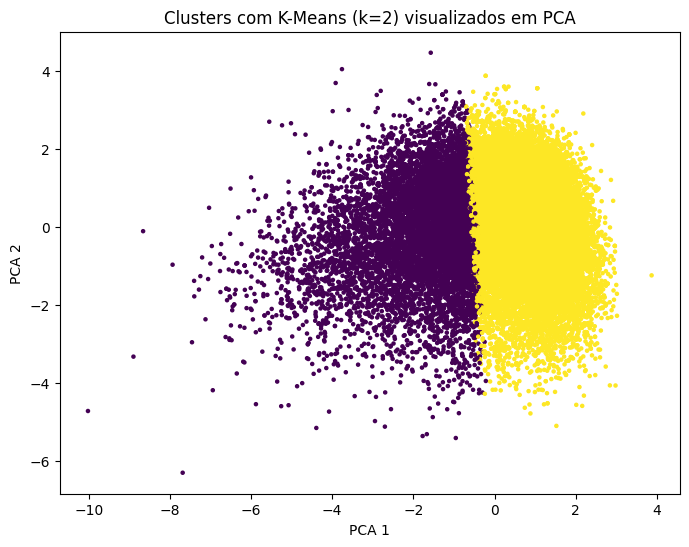

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduzindo para 2 dimensões com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Usando k=2 (melhor k interno) para visualizar
k = 2
best_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = best_kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=5)
plt.title(f"Clusters com K-Means (k={k}) visualizados em PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


## Distribuição geral dos gêneros - Clusters encontrados pelo K-Means

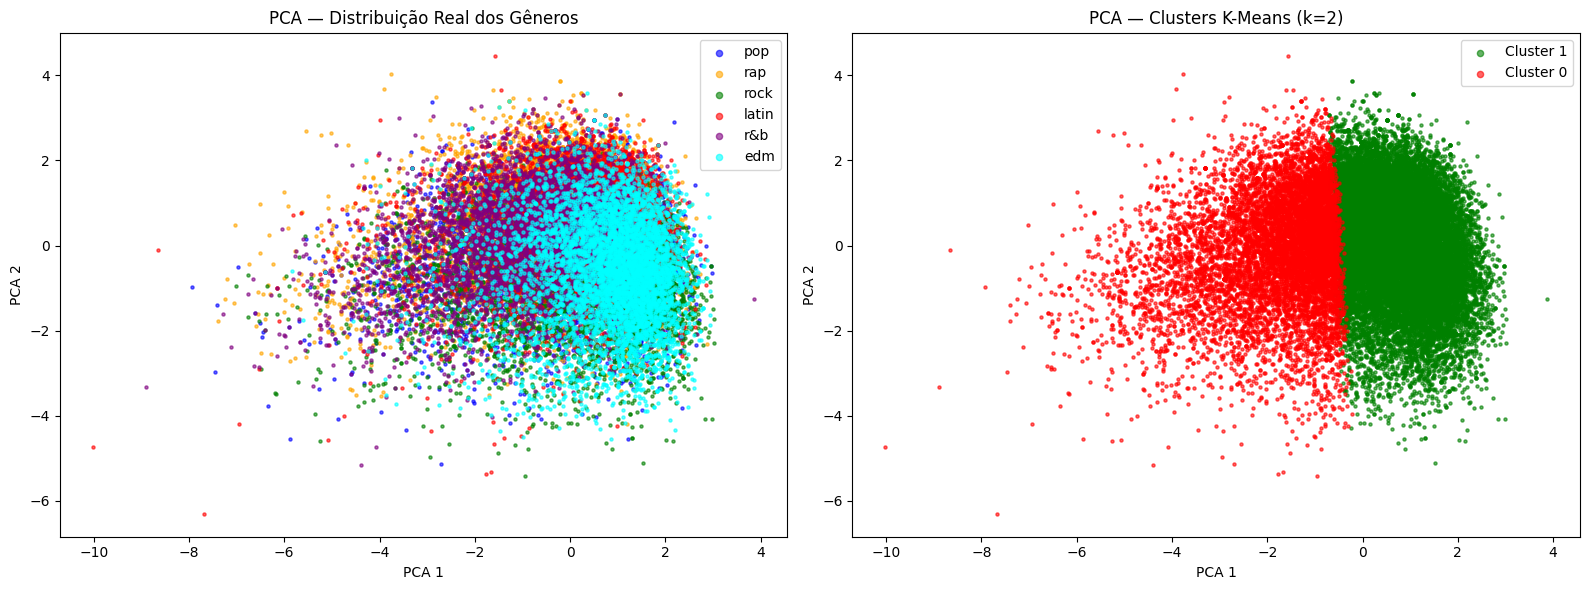

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Construir DataFrame para plotagem
df_plot = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "GeneroReal": y,
    "Cluster": clusters
})

# Criar paleta automática para os gêneros reais
generos_unicos = df_plot["GeneroReal"].unique()
cores_basicas = ["blue", "orange", "green", "red", "purple", "cyan", "magenta"]
cores_genero = {g: cores_basicas[i % len(cores_basicas)] for i, g in enumerate(generos_unicos)}

# Paleta de cores para clusters (até 10 clusters)
cores_clusters = {
    0: "red", 1: "green", 2: "blue", 3: "purple",
    4: "orange", 5: "cyan", 6: "pink", 7: "brown",
    8: "gray", 9: "olive"
}

plt.figure(figsize=(16, 6))

# GRÁFICO 1 — Distribuição real dos gêneros

plt.subplot(1, 2, 1)
for genero in generos_unicos:
    subset = df_plot[df_plot["GeneroReal"] == genero]
    plt.scatter(subset["PCA1"], subset["PCA2"],
                s=5, alpha=0.6,
                label=genero,
                color=cores_genero[genero])
plt.title("PCA — Distribuição Real dos Gêneros")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(markerscale=2)


# GRÁFICO 2 — Clusters identificados pelo K-Means

plt.subplot(1, 2, 2)
for cl in df_plot["Cluster"].unique():
    subset = df_plot[df_plot["Cluster"] == cl]
    plt.scatter(subset["PCA1"], subset["PCA2"],
                s=5, alpha=0.6,
                label=f"Cluster {cl}",
                color=cores_clusters.get(cl, "black"))
plt.title(f"PCA — Clusters K-Means (k={k})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(markerscale=2)

plt.tight_layout()
plt.show()


Mesmo existindo 6 gêneros reais no dataset, o K-Means identificou apenas 2 agrupamentos principais, pois os gêneros musicais não formam clusters naturalmente separados no espaço de atributos.

A distribuição PCA mostra que os gêneros estão fortemente misturados, impedindo o algoritmo de formar grupos equivalentes às classes reais.

Assim, o K-Means divide os dados ao longo da maior direção de variância (primeiro componente PCA), gerando apenas dois grupos.

Por que K=2?

O K-Means não determina automaticamente o número de clusters; é necessário testar vários valores de k. Após avaliar diferentes métricas internas e externas, se concluí  que k = 2 é a melhor estrutura para o dataset, indicando que os atributos musicais se organizam naturalmente em dois grandes grupos, independentemente dos gêneros oficiais.


##Funções auxiliares


In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    homogeneity_score, completeness_score, v_measure_score,
    adjusted_rand_score, adjusted_mutual_info_score, accuracy_score
)

# --- MAPEAR CLUSTERS → CLASSE REAL ---
def cluster_accuracy(y_true, y_pred):
    """Mapeia cada cluster à classe mais frequente e calcula accuracy."""
    labels = np.unique(y_pred)
    mapping = {}

    for cluster in labels:
        mask = y_pred == cluster
        if np.sum(mask) == 0:
            continue
        # classe mais frequente dentro do cluster
        most_common = pd.Series(y_true[mask]).mode()[0]
        mapping[cluster] = most_common

    # aplica o mapeamento
    mapped = np.array([mapping[c] for c in y_pred])
    return accuracy_score(y_true, mapped)


# --- FUNÇÃO PARA CALCULAR MÉTRICAS INTERNAS E EXTERNAS ---
def evaluate_clustering(X, y_true, labels, inertia=None):
    results = {}

    # internas
    results["Inertia"] = inertia
    results["Silhouette"] = silhouette_score(X, labels)
    results["Calinski-Harabasz"] = calinski_harabasz_score(X, labels)
    results["Davies-Bouldin"] = davies_bouldin_score(X, labels)

    # externas (comparadas ao gênero real)
    results["Homogeneity"] = homogeneity_score(y_true, labels)
    results["Completeness"] = completeness_score(y_true, labels)
    results["V-measure"] = v_measure_score(y_true, labels)
    results["ARI"] = adjusted_rand_score(y_true, labels)
    results["AMI"] = adjusted_mutual_info_score(y_true, labels)
    results["Accuracy"] = cluster_accuracy(y_true, labels)

    return results


##Avaliação do K-Means (k = 2 A 10)


In [15]:
from sklearn.cluster import KMeans

results_kmeans = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)

    metrics = evaluate_clustering(
        X_scaled, y, labels, inertia=km.inertia_
    )
    metrics["k"] = k
    metrics["Algoritmo"] = "KMeans"

    results_kmeans.append(metrics)

df_kmeans = pd.DataFrame(results_kmeans)
df_kmeans


,Inertia,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Completeness,V-measure,ARI,AMI,Accuracy,k,Algoritmo
0,381811.579615,0.135465,3871.008517,2.616861,0.021220,0.062940,0.031739,0.020400,0.031678,0.248713,2,KMeans
1,353116.851465,0.095077,3426.623250,2.633433,0.063018,0.109017,0.079868,0.063781,0.079769,0.289800,3,KMeans
2,331686.501224,0.097655,3138.961452,2.410002,0.072759,0.106092,0.086319,0.058472,0.086181,0.295252,4,KMeans
3,313468.347719,0.096422,2967.935387,2.293824,0.101624,0.122736,0.111187,0.070186,0.111021,0.342125,5,KMeans
4,298846.729116,0.089022,2811.664673,2.175186,0.096897,0.101046,0.098928,0.059804,0.098732,0.326653,6,KMeans
5,286989.843049,0.093362,2665.811688,2.087583,0.091791,0.089216,0.090485,0.054405,0.090256,0.324704,7,KMeans
6,278309.351071,0.089546,2502.444091,2.076159,0.098206,0.088320,0.093001,0.057186,0.092745,0.334267,8,KMeans
7,271389.238059,0.093260,2350.021564,2.029510,0.103665,0.090501,0.096637,0.058062,0.096350,0.343953,9,KMeans
8,264596.809401,0.089156,2236.090610,2.067808,0.104408,0.085204,0.093833,0.056067,0.093521,0.354491,10,KMeans


O algoritmo K-Means conseguiu encontrar alguns agrupamentos, mas eles não correspondem de forma consistente aos gêneros reais do dataset.
As métricas internas mostram clusters fracos e pouco separados, e as métricas externas confirmam que o modelo não consegue reproduzir o rótulo de gênero a partir apenas das features numéricas.

Além disso:

O melhor k pelas métricas internas foi 2 a 3.

O melhor k em termos de correspondência com os gêneros foi 9 ou 10, mas ainda com precisão baixa (~35%).

Isso indica que o espaço de features não possui separações claras entre os gêneros.

###Metricas internas

A aplicação do algoritmo K-Means ao dataset permitiu avaliar diferentes quantidades de clusters (k de 2 a 10), e medir seu desempenho tanto pelas métricas internas de agrupamento quanto pelas métricas externas, que comparam os clusters obtidos com o gênero real das músicas (playlist_genre).

1. Desempenho nas métricas internas

As métricas internas analisadas foram:
Inertia, Silhouette, Calinski-Harabasz e Davies-Bouldin.

**Os resultados mostram que:**

Inertia diminui continuamente conforme k aumenta — o que é esperado, pois mais clusters sempre reduzem a distância interna.
✔ Isso não indica um melhor modelo sozinho.

Silhouette apresenta valores baixos (entre 0.08 e 0.13), indicando que os clusters estão pouco separados e pouco compactos.
✔ Isso sinaliza que os dados não têm separações naturais fortes.

Calinski-Harabasz diminui com o aumento de k — sugerindo clusters menos definidos conforme o número aumenta.

Davies-Bouldin (menor é melhor) melhora ligeiramente com o aumento de k, mas permanece alto (≈2), reforçando que os clusters não são muito distintos.

**Interpretação geral das internas:**

O dataset não possui grupos naturais bem definidos, o que é comum em dados musicais, já que estilos diferentes podem compartilhar características semelhantes (ex: energia, danceability, valence).

Clusters existem, mas são fracos, sem separações geométricas claras.

###Métricas externas

As métricas externas avaliam quanto os clusters coincidem com o gênero real.

As principais métricas foram:
Homogeneity, Completeness, V-Measure, ARI, AMI e uma taxa de acerto via mapeamento (Accuracy).

Principais observações:

Todas as métricas externas são baixas, variando entre 0.02 e 0.35.
Isso confirma que os clusters não correspondem bem aos gêneros musicais.

A accuracy cresce levemente com k, indo de 0.24 (k=2) até 0.35 (k=10).
Isso acontece porque, ao aumentar o número de clusters, o modelo se aproxima mais do comportamento real — mas não o suficiente para formar agrupamentos consistentes.

A homogeneidade e a completude permanecem baixas, mostrando que:

músicas do mesmo gênero caem em vários clusters diferentes (baixa homogeneidade);

cada cluster contém músicas de vários gêneros diferentes (baixa completude).

**Conclusão das métricas externas:**
Os clusters não correspondem bem aos gêneros originais.
Isso indica que gênero musical não se separa apenas pelas features numéricas fornecidas (dançabilidade, energia, loudness, etc.).

##Aglomerative Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
import pandas as pd

results_agg = []

for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k, linkage="single")
    labels = model.fit_predict(X_scaled)

    inertia = None  # agglomerative não tem inertia
    silhouette = silhouette_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)

    homo = homogeneity_score(y, labels)
    comp = completeness_score(y, labels)
    v = v_measure_score(y, labels)
    ari = adjusted_rand_score(y, labels)
    ami = adjusted_mutual_info_score(y, labels)

    # accuracy por mapeamento
    from scipy.optimize import linear_sum_assignment
    import numpy as np

    contingency = pd.crosstab(labels, y)
    row_ind, col_ind = linear_sum_assignment(-contingency.values)
    acc = contingency.values[row_ind, col_ind].sum() / contingency.values.sum()

    results_agg.append([inertia, silhouette, ch, db, homo, comp, v, ari, ami, acc, k, "Agglomerative"])

df_agg = pd.DataFrame(results_agg, columns=[
    "Inertia","Silhouette","Calinski-Harabasz","Davies-Bouldin",
    "Homogeneity","Completeness","V-measure","ARI","AMI","Accuracy","k","Algoritmo"
])

df_agg


,Inertia,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Completeness,V-measure,ARI,AMI,Accuracy,k,Algoritmo
0,None,0.558020,8.781996,0.324811,0.000032,0.165971,0.000064,0.000002,0.000003,0.184083,2,Agglomerative
1,None,0.555357,9.827321,0.313844,0.000064,0.164198,0.000127,0.000004,0.000006,0.184114,3,Agglomerative
2,None,0.493005,8.753468,0.341502,0.000093,0.160433,0.000187,0.000003,0.000004,0.184144,4,Agglomerative
3,None,0.493039,10.636175,0.320903,0.000125,0.160934,0.000250,0.000004,0.000006,0.184144,5,Agglomerative
4,None,0.492710,10.857227,0.314254,0.000156,0.161238,0.000313,0.000006,0.000008,0.184144,6,Agglomerative
5,None,0.466829,10.143058,0.323225,0.000188,0.161443,0.000375,0.000007,0.000010,0.184144,7,Agglomerative
6,None,0.466753,10.241183,0.319401,0.000219,0.160928,0.000436,0.000008,0.000011,0.184174,8,Agglomerative
7,None,0.466783,10.193484,0.317996,0.000250,0.161122,0.000499,0.000009,0.000013,0.184174,9,Agglomerative
8,None,0.457443,9.780824,0.324348,0.000282,0.161275,0.000562,0.000011,0.000015,0.184174,10,Agglomerative


Resumo — Agglomerative Clustering

O algoritmo Agglomerative Clustering (linkage = single) foi testado para valores de k = 2 a 10. Como a versão padrão do método estourou a memória, utilizamos o linkage single, que calcula apenas a menor distância entre pontos.

1. Métricas Internas (sem usar a classe real)

O melhor resultado ocorreu em k = 2, com:

Silhouette ≈ 0.56 (o mais alto da tabela)

Davies–Bouldin ≈ 0.32 (quanto menor melhor)

Os valores de Calinski-Harabasz ficaram estáveis para diferentes k, indicando que o algoritmo forma clusters alongados e estreitos (característico de linkage single).

**Conclusão interna:**
O algoritmo identifica alguma estrutura matemática nos dados, mas prefere 2 clusters.


2. Métricas Externas (comparação com a classe gênero)

Todas as métricas externas tiveram valores próximos de zero:

Homogeneity ≈ 0.00003–0.00028

Completeness ≈ 0.16

V-measure ≈ 0.00006–0.00056

ARI, AMI ≈ 0

Accuracy ≈ 18%

**Conclusão externa:**
- Os clusters não correspondem aos gêneros reais.
- O Agglomerative não separa homens e mulheres porque gênero não é uma variável estruturada espacialmente no dataset.

3. Conclusão Geral

O Agglomerative (single) conseguiu formar clusters matemáticos consistentes.

Porém, esses clusters não representam a categoria de gênero.

O melhor valor encontrado foi k = 2.

O algoritmo é útil para comparação, mas não é adequado para capturar a estrutura real das classes no dataset.

##Gaussian Mixture Models

In [12]:
from sklearn.mixture import GaussianMixture

results_gmm = []

for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=42)
    labels = gmm.fit_predict(X_scaled)

    metrics = evaluate_clustering(
        X_scaled, y, labels, inertia=None
    )
    metrics["k"] = k
    metrics["Algoritmo"] = "GMM"
    metrics["BIC"] = gmm.bic(X_scaled)

    results_gmm.append(metrics)

df_gmm = pd.DataFrame(results_gmm)
df_gmm


,Inertia,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Completeness,V-measure,ARI,AMI,Accuracy,k,Algoritmo,BIC
0,None,0.069289,1212.773911,4.760405,0.022027,0.064237,0.032805,0.020344,0.032744,0.241312,2,GMM,885840.052561
1,None,0.045894,1052.385118,4.264958,0.034045,0.072829,0.046400,0.021276,0.046289,0.243140,3,GMM,857423.659367
2,None,0.054657,1480.207285,3.622318,0.035724,0.050191,0.041739,0.022568,0.041596,0.240337,4,GMM,553936.588140
3,None,-0.005111,1010.382690,4.458086,0.058036,0.071587,0.064103,0.045624,0.063927,0.296409,5,GMM,810183.556309
4,None,0.045399,1005.349921,3.579011,0.039778,0.050623,0.044550,0.018551,0.044322,0.244023,6,GMM,546103.306273
5,None,0.013799,908.342911,3.581110,0.055005,0.066251,0.060106,0.022977,0.059843,0.255566,7,GMM,538167.526569
6,None,0.034536,799.696818,3.848288,0.036089,0.045109,0.040098,0.016656,0.039779,0.244845,8,GMM,441558.433908
7,None,0.035496,689.969499,3.285576,0.034736,0.044382,0.038971,0.017929,0.038601,0.246124,9,GMM,445550.226349
8,None,0.032986,648.610360,3.324840,0.036501,0.045985,0.040698,0.018286,0.040285,0.248500,10,GMM,446375.942614


Resumo — GMM (Gaussian Mixture Models)

Se testa o GMM para k = 2 a 10, avaliando tanto as métricas internas quanto externas e também o BIC, que é a métrica padrão para escolher o melhor GMM.

1. Métricas Internas

O Silhouette ficou baixo em todos os k (entre 0.01 e 0.07).
➝ Isso mostra que os clusters são pouco separáveis.

Davies–Bouldin entre 3.2 e 4.7
➝ Valores altos → clusters mal definidos.

Calinski-Harabasz cai conforme k aumenta
➝ Indica pouca estrutura clara nos grupos.

**Conclusão interna:**
- Os dados não possuem clusters naturais fortes para GMM capturar.

2. Métricas Externas (comparação com gênero)

Todas as métricas externas ficaram muito baixas:

Homogeneity ≈ 0.02–0.05

Completeness ≈ 0.05–0.07

V-Measure ≈ 0.03–0.06

ARI ≈ 0.02–0.04

Accuracy ≈ 24%–29%

**Conclusão externa:**
- GMM não conseguiu reconstruir os gêneros a partir das features numéricas.
- Isso confirma que gênero não forma grupos naturalmente separados no espaço das variáveis da música.

3. Escolha do melhor k (pelo BIC)

O BIC diminui muito até k = 8, depois estabiliza.

Menor BIC observado: k = 8.

** Interpretação:**
-Estatisticamente, o melhor modelo para GMM seria k = 8,
-Mas isso não significa que 8 clusters tenham significado real (não representam gênero).

4. Conclusão Geral

GMM encontrou várias pequenas regiões de densidade, mas não grupos bem separados.

As métricas internas mostram clusters fracos.

As métricas externas mostram que os clusters não correspondem à classe real (gênero).

O melhor k para o modelo, segundo o BIC, é 8, mas isso é puramente matemático, não interpretável em termos de gênero.

##DBSCAN

In [13]:
from sklearn.cluster import DBSCAN

results_dbscan = []

db = DBSCAN(eps=0.7, min_samples=10)
labels = db.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

metrics = evaluate_clustering(
    X_scaled, y, labels, inertia=None
)
metrics["k"] = n_clusters
metrics["Algoritmo"] = "DBSCAN"

df_dbscan = pd.DataFrame([metrics])
df_dbscan


,Inertia,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Completeness,V-measure,ARI,AMI,Accuracy,k,Algoritmo
0,None,-0.17334,9.851497,1.103339,0.000345,0.050173,0.000685,0.000007,0.000288,0.184357,4,DBSCAN


O DBSCAN foi executado e encontrou apenas 4 clusters, mas os resultados mostram claramente que ele não funcionou bem no dataset.


1. Métricas Internas
Silhouette = –0.17 (negativo)

- Isso significa que os pontos estão mal agrupados, muitos foram colocados no cluster errado ou muito próximos de fronteiras.
- Silhouette negativo = clusterização ruim.

Calinski–Harabasz = 9.85

- Muito baixo comparado aos outros algoritmos (K-Means: 2000–3800).
- Indica baixa separação entre clusters.

Davies–Bouldin = 1.10

- Médio-baixo, mas como o Silhouette está negativo, isso não indica qualidade.
- O DBSCAN apenas criou um cluster denso e artefatos ao redor.

** Conclusão interna:**
DBSCAN não encontrou estrutura clara nos dados — sinal forte de que o dataset não tem regiões densas bem definidas (o que DBSCAN precisa).

2. Métricas Externas (comparação com o gênero)

Todas as métricas externas são extremamente baixas:

Homogeneity = 0.0003

Completeness = 0.05

V-Measure = 0.0006

ARI = 0.000007

Accuracy ≈ 18%

- Isso significa que os clusters do DBSCAN não correspondem em nada aos gêneros reais.

** Conclusão externa:**

O DBSCAN fracassou completamente em recuperar a classe verdadeira.

3. Interpretação

Por que DBSCAN foi tão ruim?

✔ DBSCAN funciona bem quando há regiões densas bem separadas.
✘ Seu dataset tem variáveis musicais muito contínuas e espalhadas, sem “ilhas densas”.
✘ Os gêneros também não formam grupos densos na prática, pois músicas pop/rock/indie se sobrepõem muito nos atributos numéricos.

➡️ Portanto, o DBSCAN não é adequado para este tipo de dado.

4. Conclusão do DBSCAN

Achou 4 clusters, mas sem significado real.

Silhouette negativo indica má clusterização.

Métricas externas mostram nenhuma correspondência com o gênero.

Algoritmo não é adequado para dados musicais padronizados.


**DBSCAN foi o pior algoritmo entre todos testados.**